# STEP 1 : RECORD your PODCAST 
### DUAL MONO - 
### FREQ check
### SPECTOGRAM check
### High Pass
### Noise Reduction 


In [1]:
# AUDIO MANIPULATION
import sounddevice as sd
import soundfile as sf

# PLAY recording  and Analyze GAIN
from _ms_pod_global_functions import wav_play ,wav_analyze_gain
# Analyze FREQ distribution
from _ms_pod_global_functions import wav_freq_dist_pie_chart, wav_freq_dist_plot,wav_plot_spectrogram

# MIXED plots #PLOT amplitud, lufs, spectogram 
from _ms_pod_global_functions import  wav_plot_3 ,wav_audio_ana_6

# COMPARE DIRECTORY  input for wav files IN ONE FOLDER
from _ms_pod_global_functions import direc_wav_compare_spct



# Query and print all audio devices
devices = sd.query_devices()
for idx, device in enumerate(devices):
    print(f"Index: {idx}, Device Name: {device['name']}")
    
# List all devices and find your Focusrite index
print(sd.query_devices())

YOUR_FOCUSRITE_DEVICE_INDEX = 2  # Replace with your Focusrite index

# AUDIO DATA Transfer DIREC and read any WAV
direc_wav = "_pod_1_recording"
file_path = f"{direc_wav}/_0_vr_raw_1.wav" #wav_play(file_path)

Index: 0, Device Name: DELL U2415
Index: 1, Device Name: Yeriko’s iPhone Microphone
Index: 2, Device Name: Scarlett 2i2 USB
Index: 3, Device Name: MacBook Air Microphone
Index: 4, Device Name: MacBook Air Speakers
Index: 5, Device Name: rekordbox Aggregate Device
  0 DELL U2415, Core Audio (0 in, 2 out)
  1 Yeriko’s iPhone Microphone, Core Audio (1 in, 0 out)
< 2 Scarlett 2i2 USB, Core Audio (2 in, 2 out)
> 3 MacBook Air Microphone, Core Audio (1 in, 0 out)
  4 MacBook Air Speakers, Core Audio (0 in, 2 out)
  5 rekordbox Aggregate Device, Core Audio (0 in, 2 out)


In [2]:
sd.query_devices()

  0 DELL U2415, Core Audio (0 in, 2 out)
  1 Yeriko’s iPhone Microphone, Core Audio (1 in, 0 out)
< 2 Scarlett 2i2 USB, Core Audio (2 in, 2 out)
> 3 MacBook Air Microphone, Core Audio (1 in, 0 out)
  4 MacBook Air Speakers, Core Audio (0 in, 2 out)
  5 rekordbox Aggregate Device, Core Audio (0 in, 2 out)

### one channel record - SINGLE

In [3]:
# ------------------------- one channel
# import sounddevice as sd
# import numpy as np
# import wavio

# # Parameters
# RATE = 44100    # samples per second
# CHANNELS = 1    # Changed from 2 to 1
# DTYPE = np.int16
# FILENAME = "voice_recording.wav"
# SECONDS = 60*10  # Duration of recording

# # Record audio
# print("Recording...")
# audio_data = sd.rec(int(SECONDS * RATE), samplerate=RATE, channels=CHANNELS, dtype=DTYPE)
# sd.wait()  # Wait until recording is finished
# print("Recording done!")

# # Save as WAV file
# wavio.write(FILENAME, audio_data, RATE, sampwidth=2)

# # Playback
# print("Playing back...")
# sd.play(audio_data, RATE)
# sd.wait()
# print("Playback finished!")


### one channel - DUAL mic

In [24]:
import sounddevice as sd
import numpy as np
import wavio
import time
import sys  # For the progress bar

# Replace this index with your Focusrite device index
DEVICE_INDEX = YOUR_FOCUSRITE_DEVICE_INDEX  # Replace this

# Parameters
RATE = 44100  # samples per second
CHANNELS = 1  # Make sure to use the correct number of channels supported by your device
DTYPE = np.int16
FILENAME = file_path  # Ensuring {direc}/name for locations
SECONDS = 12*60  # Duration of recording

# 5-Second Countdown
for i in range(5, 0, -1):
    print(f"\nRecording starts in {i} seconds.")
    time.sleep(1)

# Initialize recording and progress bar
print("Recording...\n")
audio_data = sd.rec(int(SECONDS * RATE), samplerate=RATE, channels=CHANNELS, dtype=DTYPE, device=DEVICE_INDEX)

# Progress bar for recording duration
for i in range(SECONDS):
    sys.stdout.write(f"\rProgress: [{'=' * i}{' ' * (SECONDS - i - 1)}] {i+1}/{SECONDS} seconds")
    sys.stdout.flush()
    time.sleep(1)

# Finish recording and progress bar
sd.wait()
print("\n\n --- >>> Recording done <<< --- ")

# Save as WAV file
wavio.write(FILENAME, audio_data, RATE, sampwidth=2)

# Playback
# print("Playing back...")
# sd.play(audio_data, RATE, device=DEVICE_INDEX)
# sd.wait()
# print("Playback finished!")

actual_rate = sd.query_devices(DEVICE_INDEX, 'input')['default_samplerate']
print("Actual Sample Rate:", actual_rate)


Recording starts in 5 seconds.

Recording starts in 4 seconds.

Recording starts in 3 seconds.

Recording starts in 2 seconds.

Recording starts in 1 seconds.
Recording...

Progress: [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] 720/720 seconds

 --- >>> Recording done <<< --- 


In [4]:
# # # PLAY AUDIO
# sd.play(audio_data, RATE, device=2 )
# sd.wait()

In [5]:
# PRE -PROCESSING for next steps of 1_chunk at the time

# take recordings to DEMUCS & Convert from wav two channel to ONE CHANNEL
from pydub import AudioSegment

def convert_stereo_to_mono(input_file, output_file):
    """
    Convert a stereo WAV file to a mono WAV file.

    :param input_file: Path to the input stereo WAV file.
    :param output_file: Path where the output mono WAV file will be saved.
    """
    # Load the stereo audio file
    stereo_audio = AudioSegment.from_wav(input_file)

    # Convert to mono
    mono_audio = stereo_audio.set_channels(1)

    # Export the mono audio to a file
    mono_audio.export(output_file, format="wav")

# Usage
input_path_stems = "_pod_1_recording/vocals.wav"
output_path_stems = "_pod_1_recording/_0_voc_vr.wav"
convert_stereo_to_mono(input_path_stems, output_path_stems)

##################################


In [6]:
my_folder_path = direc_wav 
#wav_read_files(path_pod)
exec(open(f"/Users/yerik/_apple_source/PY/GLOBAL/_2_read_file_paths.py",encoding="utf-8").read()) #paths
#df

ATTN ::: <E>  AFTER making sure that you have assigned the DIRECTORY PATH to ::: var ::: my_folder_path 


***df*** will be returned having ::: 7  rows, write df in next cell to see your DATA FRAME

second part FREQUENCIES OF df :::

Grand Total Size in MB: 302.817
Grand Total Size in Bytes: 317526324.000
Grand Total Size in GB: 0.296

 FREQUENCY TABLE::: 

    Extension  frequency  total_size_in_mb
0      .wav          4        302.810837
1                    3          0.005863


In [7]:
df

,Name,Type,Path,Extension,Size (MB)
3,vocals.wav,File,_pod_1_recording/vocals.wav,.wav,121.124310
4,_0_vr_raw_1.wav,File,_pod_1_recording/_0_vr_raw_1.wav,.wav,60.562176
5,_0_vr_raw_.wav,File,_pod_1_recording/_0_vr_raw_.wav,.wav,60.562176
6,_0_voc_vr.wav,File,_pod_1_recording/_0_voc_vr.wav,.wav,60.562176
2,.DS_Store,File,_pod_1_recording/.DS_Store,,0.005863
0,.ipynb_checkpoi,Directory,_pod_1_recording/.ipynb_checkpoints,,0.000000
1,_edit_phase,Directory,_pod_1_recording/_edit_phase,,0.000000


In [8]:
# READ CHARACTERISTICS
direc_py_fields = '_pod_2_tools/2_PY_READ_FIELDS'
direc= direc_py_fields
# ---------------------------------------
# COMPUTE DURATION and BITRATE          &
# ---------------------------------------
#################################################--------------------- Calculate duration
exec(open(f"{direc}/_ms_fields_1_duration.py", encoding="utf-8").read())
df['Duration'] = [get_duration(path) for path in tqdm(df['Path'], desc="DURATION:::Processing files")]
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['duration_minutes'] = df['Duration'] / 60      # Convert duration to minutes and filter
print('>>> DURATION :==> has been registered in df ')

################################################---------------------- Calculate bitrate
exec(open(f"{direc}/_ms_fields_2_bitrate.py", encoding="utf-8").read())
df['bitrate'] = df.apply(lambda row: compute_bitrate(row['Path'], row['Duration']), axis=1)
print('>>> BITRATE :==>  has been registered in df ')
#
# ---------------------------------------
# COMPUTE ID-tags - LUFS amd BPM        &
# ---------------------------------------
################################################                                 1)  ID-TAGS
exec(open(f"{direc}/_ms_pl_info_1a_all-id-tags.py", encoding="utf-8").read())
print('>>> ID-TAGS :==>  has been registered in df ')
################################################                                 2)  LUFS
exec(open(f"{direc}/_ms_pl_info_2_all_LUFS.py",encoding="utf-8").read())
df['lufs'] = compute_lufs_for_paths(df['Path'])
print('>>> LUFS :==>  has been registered in df ')
################################################                                3)  BPM
exec(open(f"{direc}/_ms_pl_info_3_BPM.py",encoding="utf-8").read())
df['BPM'] = [compute_bpm(x) if x.endswith(tuple(audio_extensions)) else None for x in tqdm(df['Path'], desc="Computing BPM")]
print('>>>  BPM :==>  has been registered in df ')
################################################                              4)  SR
exec(open(f"{direc}/_ms_pl_info_4_Sample_Rate.py",encoding="utf-8").read())
direc_wav_read_sr(df)
print('>>> (sr) :==>  has been registered in df ')
################################################                              4)  Peak-AMp
exec(open(f"{direc}/_ms_pl_info_5_Peak_Amp.py",encoding="utf-8").read())
direc_wav_read_pa(df)
print('>>> Peak Amp :==>  has been registered in df ')

DURATION:::Processing files: 100%|█| 7/7 [00:02<00


>>> DURATION :==> has been registered in df 
>>> BITRATE :==>  has been registered in df 


Processing WAV Files: 100%|█| 4/4 [00:00<00:00,  8


>>> ID-TAGS :==>  has been registered in df 


Computing LUFS: 100%|█| 4/4 [00:06<00:00,  1.53s/f


>>> LUFS :==>  has been registered in df 


Computing BPM: 100%|█| 4/4 [00:05<00:00,  1.36s/it


>>>  BPM :==>  has been registered in df 
>>> (sr) :==>  has been registered in df 


Processing audio files for peak amplitude: 100%|█|

>>> Peak Amp :==>  has been registered in df 


In [9]:
df

,Name,Type,Extension,Size (MB),bitrate,Duration,duration_minutes,Path,idt_title,idt_artist,idt_album,idt_year,idt_track,idt_genre,idt_comment,idt_audio_offset,lufs,BPM,sr,peak_amp
0,vocals.wav,File,.wav,121.124310,1411.200489,720.0,12.0,_pod_1_recording/vocals.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,-29.245,150.588235,44100,0.272263
1,_0_vr_raw_1.wav,File,.wav,60.562176,705.600489,720.0,12.0,_pod_1_recording/_0_vr_raw_1.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,-32.169,143.540921,44100,0.484375
2,_0_vr_raw_.wav,File,.wav,60.562176,705.600489,720.0,12.0,_pod_1_recording/_0_vr_raw_.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,-32.169,143.540921,44100,0.484375
3,_0_voc_vr.wav,File,.wav,60.562176,705.600489,720.0,12.0,_pod_1_recording/_0_voc_vr.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,-32.242,150.579586,44100,0.272278


In [10]:
# PRE ANALIZE THE CHOSSEN ONE, if original rec, Demcus 1 or 2 channel . make function to pick her

In [11]:
file_path_chosen = "_pod_1_recording/_0_voc_vr.wav"
file_path = file_path_chosen 

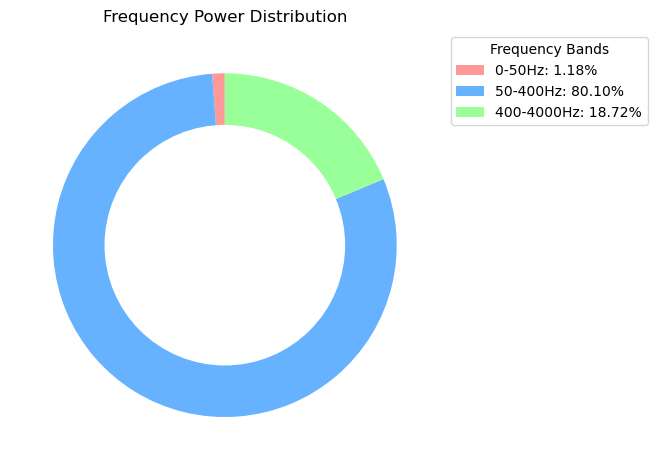

In [12]:
wav_freq_dist_pie_chart(file_path)

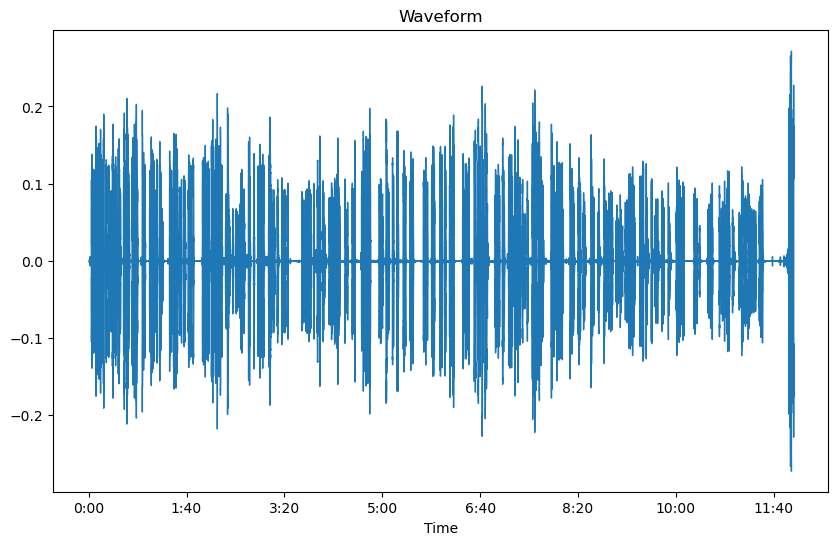

Peak Level (linear scale): 0.272
RMS Level (linear scale): 0.019
RMS Level (dBFS): -34.60 dB

Frequency Band Power (dB):
Super Low (< 50Hz): 0.51 dB
Low (50Hz - 400Hz): 22.62 dB
Mid (400Hz - 4kHz): -10.38 dB
High (> 4kHz): -49.06 dB

Interpretation:
- Your recording is softer than typical levels for spoken content. Consider amplifying.
signfc power in low frequencies, which add unnecessary rumble or noise. Consider using a high-pass filter.


In [13]:
wav_analyze_gain(file_path)

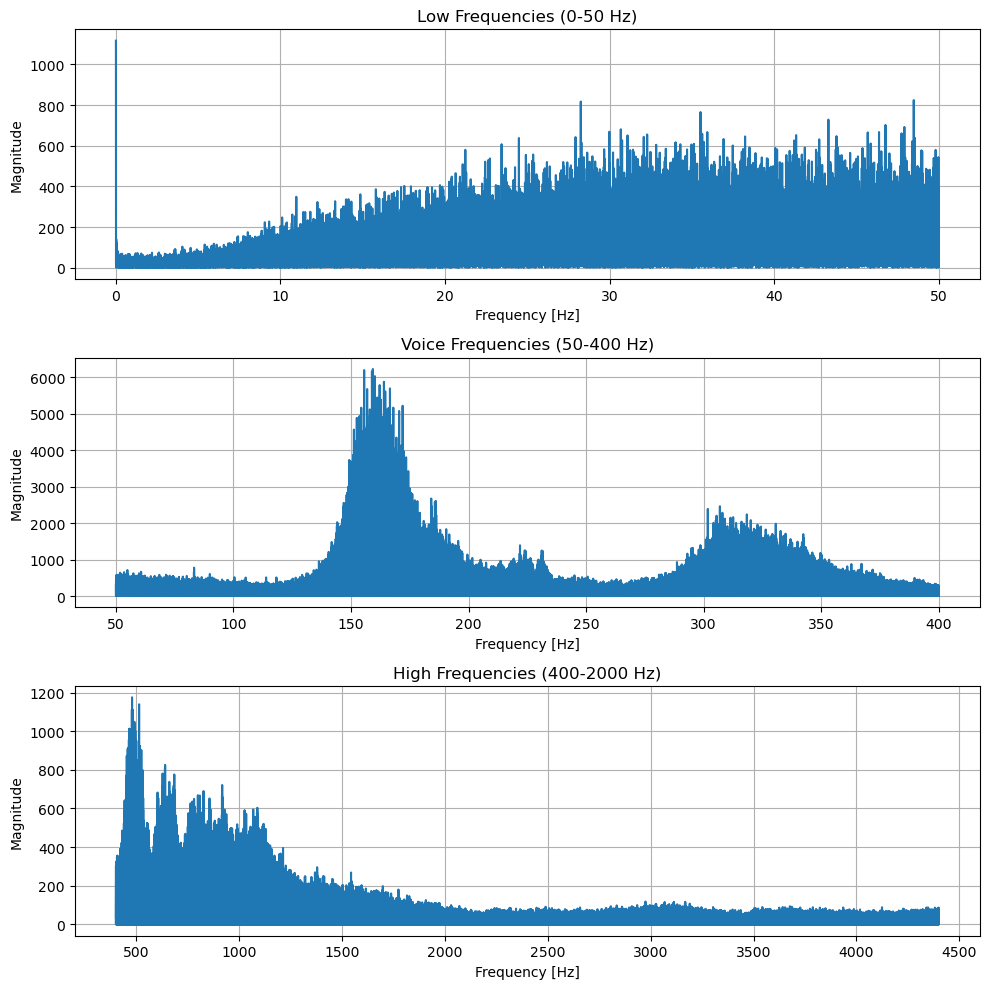

In [14]:
wav_freq_dist_plot(file_path)